<a href="https://colab.research.google.com/github/shrutib55/cs4372_assignment2/blob/main/compmethods_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import dataset from google drive url
!pip install gdown
import gdown
file_id = "1xSamFrBsxKyfwOksHkc9bb1mHpNyoRCQ"
gdown.download(f"https://drive.google.com/uc?id={file_id}", "train.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1xSamFrBsxKyfwOksHkc9bb1mHpNyoRCQ
To: /content/train.csv
100%|██████████| 23.2M/23.2M [00:00<00:00, 45.6MB/s]


'train.csv'

In [ ]:
!pip install graphviz
!pip install scikit-learn imbalanced-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
# read data
data = pd.read_csv("train.csv")
print(data.head())

<ipython-input-4-5956ab8e58fb>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv")


         ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes        

## Exploratory Data Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [ ]:
# Dropping columns due to high number of null values and insignificance towards target
columns_to_drop = [
    'Social_Circle_Default',
    'Score_Source_1',
    'Client_Occupation',
    'Credit_Bureau',
    'Own_House_Age',
    'ID',
    'Score_Source_2',
    'Score_Source_3',
]
data.drop(columns=columns_to_drop, inplace=True)

In [ ]:
null_counts = data.isnull().sum()
print(null_counts)

Client_Income                 3607
Car_Owned                     3581
Bike_Owned                    3624
Active_Loan                   3635
House_Own                     3661
Child_Count                   3638
Credit_Amount                 3632
Loan_Annuity                  4812
Accompany_Client              1746
Client_Income_Type            3701
Client_Education              3645
Client_Marital_Status         3473
Client_Gender                 2413
Loan_Contract_Type            3651
Client_Housing_Type           3687
Population_Region_Relative    4857
Age_Days                      3600
Employed_Days                 3649
Registration_Days             3614
ID_Days                       5968
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Family_Members         2410
Cleint_City_Rating            2409
Application_Process_Day       2428
Application_Process_Hour      3663
Client_Permanent_Match_Tag       0
Client_Contact_Work_

In [ ]:
# Drop null values from data
data.dropna(inplace=True)

print(data.size)

1804192


In [ ]:
#default_1 = data[data['Default'] == 1]
#default_0 = data[data['Default'] == 0]
#subset_default_0 = default_0.sample(n= int(0.1 * len(default_0)), random_state=42)
#balanced_data = pd.concat([subset_default_0, default_1])
#balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
balanced_data = data.copy()

In [ ]:
# Look at the data's distribution of the target variable
balanced_data['Default'].value_counts()

Default
0    51841
1     4540
Name: count, dtype: int64

In [ ]:
# Ensure numeric variables are numeric (some had some non-numeric characters in them)
numeric_columns = ['Client_Income', 'Credit_Amount', 'Loan_Annuity',
                   'Age_Days', 'Employed_Days', 'Registration_Days',
                   'ID_Days', 'Phone_Change']
for col in numeric_columns:
    balanced_data[col] = pd.to_numeric(balanced_data[col], errors='coerce')

data_updated = balanced_data.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
binary_columns = ['Accompany_Client', 'Client_Income_Type', 'Client_Education',
                   'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
                   'Client_Housing_Type', 'Population_Region_Relative',
                   'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
                   'Type_Organization']

for col in binary_columns:
  data_updated[col] = data_updated[col].astype(str)
  data_updated[col] = label_encoder.fit_transform(data_updated[col])

data_updated.head()


Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0          6750.0        0.0         0.0          1.0        0.0          0.0   
5         11250.0        0.0         1.0          1.0        1.0          1.0   
6         15750.0        1.0         1.0          0.0        1.0          0.0   
7         13500.0        0.0         0.0          1.0        1.0          0.0   
10        27000.0        0.0         0.0          1.0        1.0          1.0   

    Credit_Amount  Loan_Annuity  Accompany_Client  Client_Income_Type  ...  \
0        61190.55       3416.85                 1                   1  ...   
5        13752.00        653.85                 1                   5  ...   
6       128835.00       3779.55                 1                   4  ...   
7        60415.20       3097.80                 1                   4  ...   
10       67500.00       3375.00                 1                   2  ...   

    Workphone_Working  Client_Family_Members  Cleint_City_Rating  \
0                   0                    2.0                 2.0   
5                   0                    2.0                 2.0   
6                   0                    1.0                 2.0   
7                   1                    2.0                 2.0   
10                  0                    2.0                 2.0   

    Application_Process_Day  Application_Process_Hour  \
0                       6.0                      17.0   
5                       2.0                      10.0   
6                       3.0                      14.0   
7                       4.0                      15.0   
10                      3.0                      12.0   

    Client_Permanent_Match_Tag  Client_Contact_Work_Tag  Type_Organization  \
0                            1                        1                 42   
5                            1                        1                 33   
6                            1                        1                 57   
7                            1                        1                 57   
10                           1                        1                 11   

    Phone_Change  Default  
0           63.0        0  
5          739.0        0  
6            0.0        0  
7         1687.0        0  
10        1799.0        0  

[5 rows x 32 columns]

In [ ]:
data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56381 entries, 0 to 121855
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Client_Income               56375 non-null  float64
 1   Car_Owned                   56381 non-null  float64
 2   Bike_Owned                  56381 non-null  float64
 3   Active_Loan                 56381 non-null  float64
 4   House_Own                   56381 non-null  float64
 5   Child_Count                 56381 non-null  float64
 6   Credit_Amount               56377 non-null  float64
 7   Loan_Annuity                56374 non-null  float64
 8   Accompany_Client            56381 non-null  int64  
 9   Client_Income_Type          56381 non-null  int64  
 10  Client_Education            56381 non-null  int64  
 11  Client_Marital_Status       56381 non-null  int64  
 12  Client_Gender               56381 non-null  int64  
 13  Loan_Contract_Type          56381 n

In [ ]:
data_updated.shape

(56381, 32)

<function matplotlib.pyplot.show(close=None, block=None)>

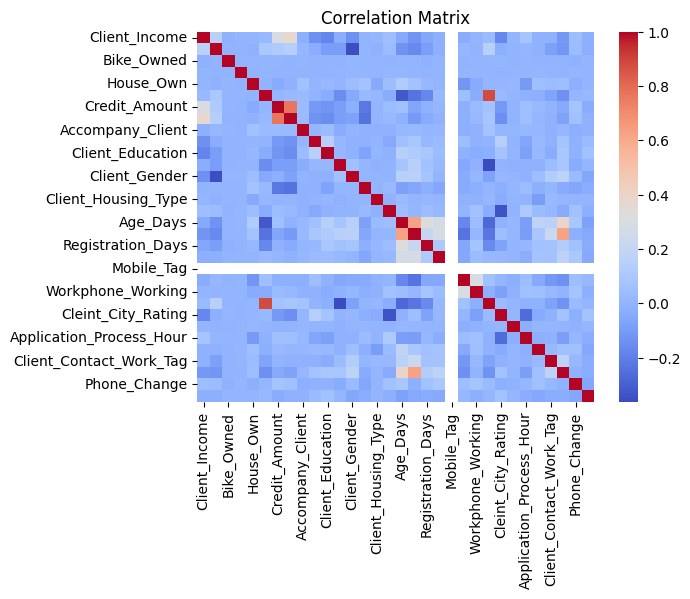

In [ ]:
# Look at correlation of the data
corr_matrix = data_updated.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

In [ ]:
# Rank correlation of variables with the target variable
correlation_with_y = corr_matrix['Default'].sort_values(ascending=False)
print(correlation_with_y)

Default                       1.000000
Cleint_City_Rating            0.064570
Client_Education              0.059163
Client_Income_Type            0.030428
Child_Count                   0.020438
Homephone_Tag                 0.018440
Client_Family_Members         0.009913
Client_Marital_Status         0.008582
Application_Process_Day       0.005350
Client_Housing_Type           0.003527
Active_Loan                   0.003286
House_Own                     0.000835
Bike_Owned                    0.000831
Accompany_Client             -0.010731
Loan_Annuity                 -0.015459
Workphone_Working            -0.019908
Client_Income                -0.022716
Car_Owned                    -0.023554
Population_Region_Relative   -0.024694
Loan_Contract_Type           -0.028301
Application_Process_Hour     -0.029104
Type_Organization            -0.029389
Client_Contact_Work_Tag      -0.029895
Credit_Amount                -0.033586
Registration_Days            -0.036908
Employed_Days            

In [ ]:
# Selected features based on correlation greater than abs value of 0.02
selected_features = [
    'Cleint_City_Rating',
    'Client_Education',
    'Age_Days',
    'Phone_Change',
    'Client_Gender',
    'ID_Days',
    'Employed_Days',
    'Client_Permanent_Match_Tag',
    'Client_Income_Type',
    'Registration_Days',
    'Application_Process_Hour',
    'Credit_Amount',
    'Type_Organization',
    'Client_Income',
    'Client_Contact_Work_Tag',
    'Loan_Contract_Type',
    'Population_Region_Relative',
    'Car_Owned',
    'Child_Count',
    'Default'
]

data_updated = data_updated[selected_features]

In [ ]:
# Scale data and split into train and test split
X = data_updated.drop('Default', axis=1)
y = data_updated['Default']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Drop null values that appeared after scaling
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)
y_train = pd.DataFrame(y_train)
y_test - pd.DataFrame(y_test)

X_train, y_train = X_train.align(y_train, join='inner', axis=0)
X_test, y_test = X_test.align(y_test, join='inner', axis=0)

X_train = X_train.dropna()
X_test = X_test.dropna()

y_train = y_train.loc[X_train.index].reset_index(drop=True)
y_test = y_test.loc[X_test.index].reset_index(drop=True)

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
#Oversampling data to form a more balanced training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Plain Decision Tree

In [ ]:
# Create list of hyperparameters to test with grid search and run decision tree
dt_params = {'max_depth': [10, 20, 50],
             'min_samples_split': [2, 5, 10, 15],
             'min_samples_leaf': [1, 2, 5],
             'max_features': [None, 'sqrt', 'log2']}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

dt_grid_search.best_params_

{'max_depth': 50,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [ ]:
clf = dt_grid_search.best_estimator_

In [ ]:
feature_cols = [
    'Cleint_City_Rating',
    'Client_Education',
    'Age_Days',
    'Phone_Change',
    'Client_Gender',
    'ID_Days',
    'Employed_Days',
    'Client_Permanent_Match_Tag',
    'Client_Income_Type',
    'Registration_Days',
    'Application_Process_Hour',
    'Credit_Amount',
    'Type_Organization',
    'Client_Income',
    'Client_Contact_Work_Tag',
    'Loan_Contract_Type',
    'Population_Region_Relative',
    'Car_Owned',
    'Child_Count'
]

In [ ]:
# Plot tree viz
dot_data = tree.export_graphviz(clf, out_file=None,
                                 feature_names=feature_cols,
                                 class_names=['0', '1'],
                                 filled=True, rounded=True,
                                 special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png", cleanup=True)
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.231515 to fit


In [ ]:
dt_y_pred = clf.predict(X_test)
dt_y_probs = dt_grid_search.predict_proba(X_test)[:, 1]
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       983
           1       0.08      0.12      0.10        83

    accuracy                           0.83      1066
   macro avg       0.50      0.50      0.50      1066
weighted avg       0.86      0.83      0.84      1066



In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, dt_y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree')
plt.legend(loc='lower right')
plt.show()


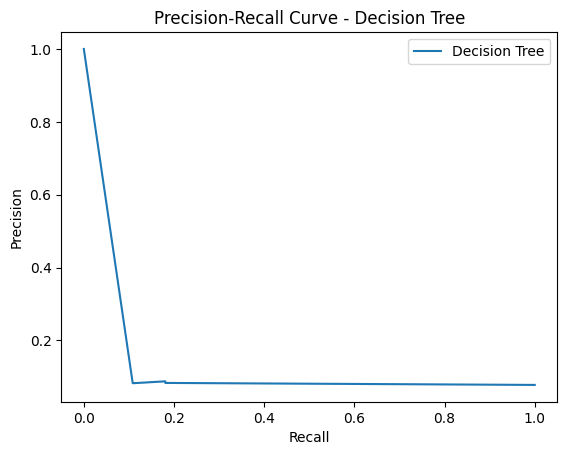

In [ ]:
# Plot precision recall curve
dt_precision, dt_recall, _ = precision_recall_curve(y_test, dt_y_probs)
plt.figure()
plt.plot(dt_recall, dt_precision, label='Decision Tree')
plt.title('Precision-Recall Curve - Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='upper right')
plt.show()

# Random Forest Classifier

In [ ]:
# List hyperparameters to try for random forest model and run
rf = RandomForestClassifier()
params = {'max_depth': [5, 7, 9],
          'n_estimators': [50, 100, 150],
          'max_features': ['sqrt', 'log2']
          }

rf_grid = GridSearchCV(rf, params, cv=10, scoring='accuracy', return_train_score=False)
rf_grid.fit(X_test, y_test)

print(rf_grid.best_params_)
print(rf_grid.score(X_test, y_test))

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
0.9230769230769231


In [ ]:
clf_rf = rf_grid.best_estimator_

In [ ]:
y_pred = clf_rf.predict(X_test)
y_probs = rf_grid.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       983
           1       1.00      0.01      0.02        83

    accuracy                           0.92      1066
   macro avg       0.96      0.51      0.49      1066
weighted avg       0.93      0.92      0.89      1066



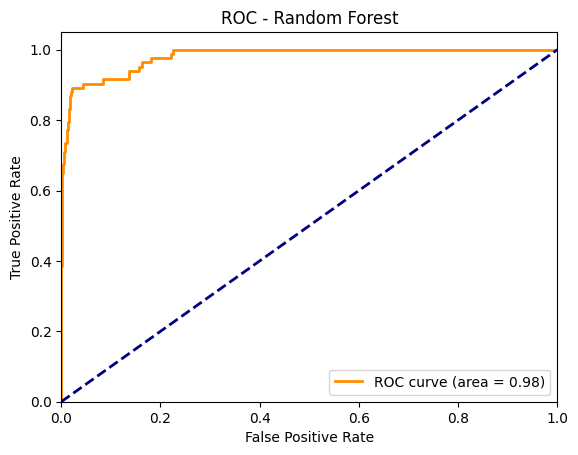

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

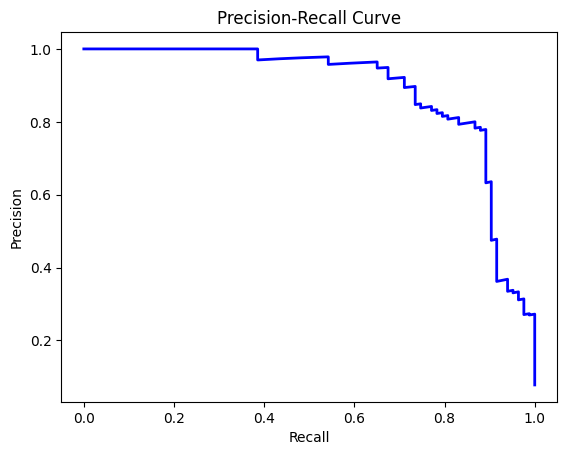

In [ ]:
# Plot precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Plot confusion matrix
y_pred = rf_grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Adaboost

In [ ]:
# List hyperparameters to test for adaboost
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
}

In [ ]:
# Run model via gris search
grid_search = GridSearchCV(estimator=AdaBoostClassifier(random_state=42), param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 150}

In [ ]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.84      0.88       983
           1       0.09      0.19      0.12        83

    accuracy                           0.79      1066
   macro avg       0.51      0.51      0.50      1066
weighted avg       0.86      0.79      0.82      1066



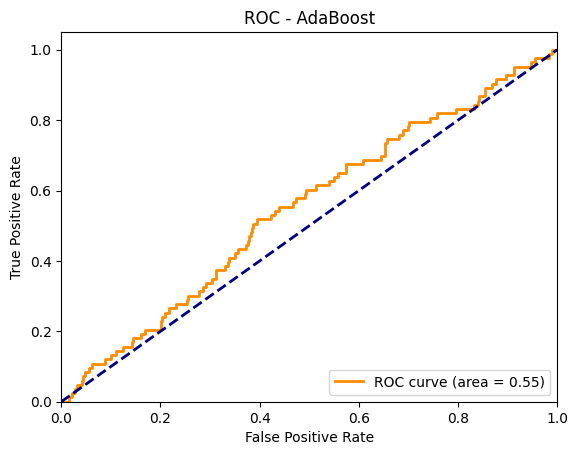

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AdaBoost')
plt.legend(loc='lower right')
plt.show()

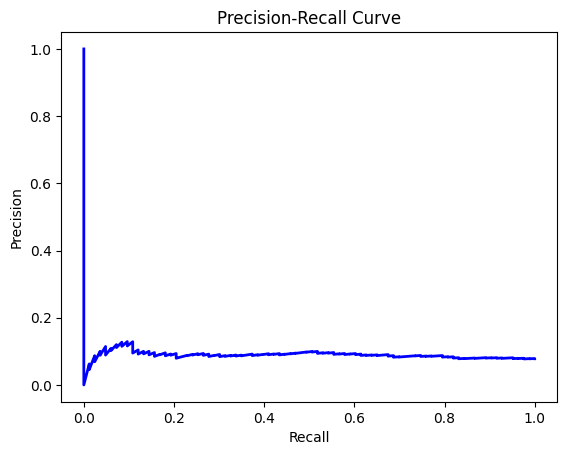

In [ ]:
# Plot precision recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# XGBoost

In [ ]:
# List hyperparameters for xgboost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

In [ ]:
# Run xgboost
xg_grid_search = GridSearchCV(estimator= XGBClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

xg_grid_search.fit(X_train, y_train)

xg_grid_search.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


{'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200}

In [ ]:
clf = xg_grid_search.best_estimator_
y_pred = clf.predict(X_test)
y_probs = grid_search.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       983
           1       0.22      0.02      0.04        83

    accuracy                           0.92      1066
   macro avg       0.57      0.51      0.50      1066
weighted avg       0.87      0.92      0.89      1066



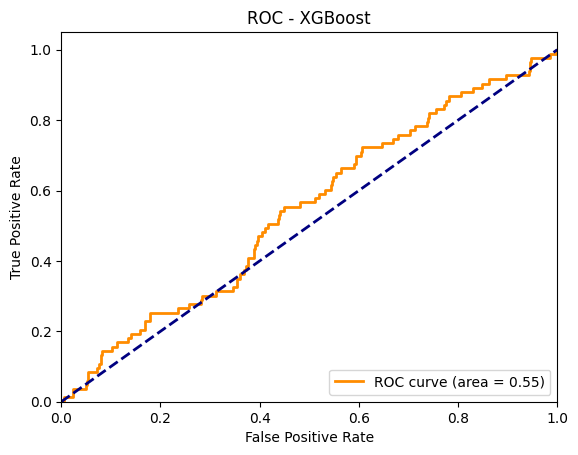

In [ ]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - XGBoost')
plt.legend(loc='lower right')
plt.show()

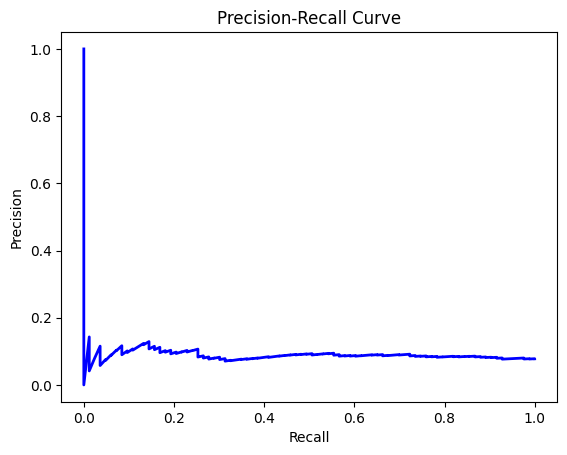

In [ ]:
# Plot precision recall curve
precision, recall, _ = precision_recall_curve(y_test_clean, y_probs)

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()